<a href="https://colab.research.google.com/github/batul-hussain/Apollo_case_study/blob/main/Apollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
from scipy.stats import shapiro
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/scaler case study/Apollo Case Study/scaler_apollo_hospitals.csv')
df.shape

(1338, 8)

In [ ]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [ ]:
df.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


## **GRAPHICAL AND NON-GRAPHICAL ANALYSIS**

In [ ]:
df.nunique()

Unnamed: 0                 1338
age                          47
sex                           2
smoker                        2
region                        4
viral load                  462
severity level                6
hospitalization charges    1320
dtype: int64

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df['severity level'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

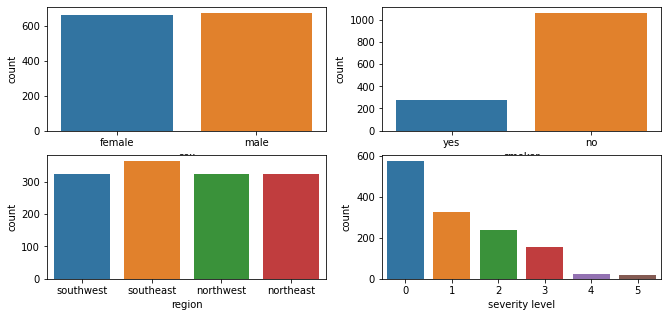

In [ ]:
fig,axis = plt.subplots(nrows = 2,ncols = 2,figsize = (11,5))
sns.countplot(df['sex'],ax=axis[0,0])
sns.countplot(df['smoker'],ax=axis[0,1])
sns.countplot(df['region'],ax=axis[1,0])
sns.countplot(df['severity level'],ax=axis[1,1])

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000., 180000.]),
 <a list of 11 Text major ticklabel objects>)

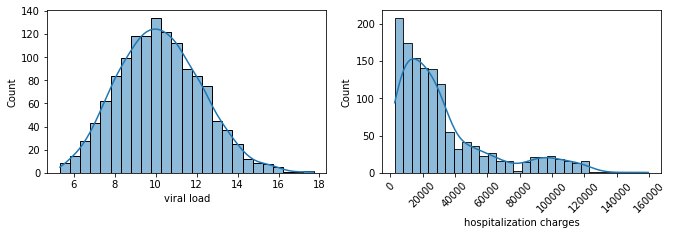

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (11,3))
sns.histplot(df['viral load'],kde =True,ax=axis[0])
sns.histplot(df['hospitalization charges'],kde = True,ax=axis[1])
plt.xticks(rotation=45)

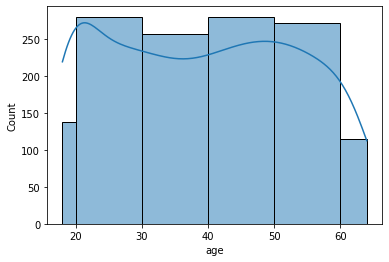

In [ ]:
sns.histplot(df['age'],kde =True,bins = [18,20,30,40,50,60,64])

*`ANALYZING PARAMETERS WITH RESPECT TO GENDER`*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


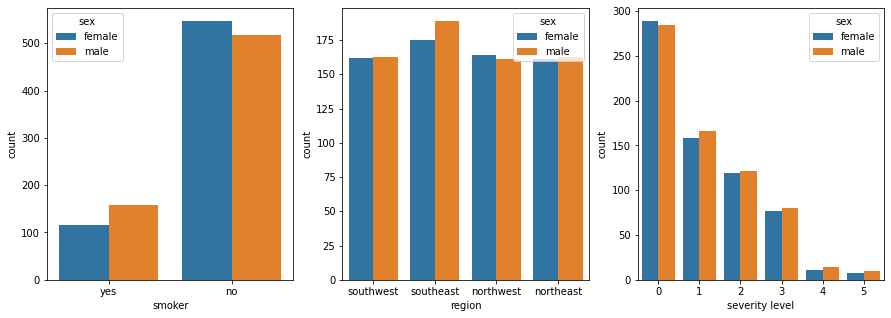

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
sns.countplot(df['smoker'],hue = df['sex'],ax=axis[0])
sns.countplot(df['region'],hue = df['sex'],ax=axis[1])
sns.countplot(df['severity level'],hue = df['sex'],ax=axis[2])

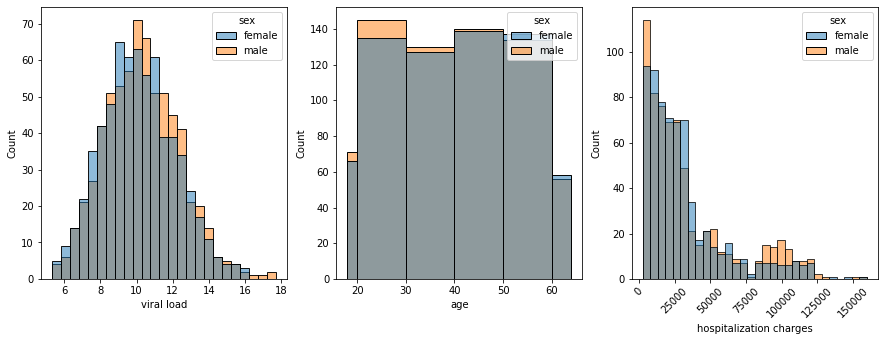

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
plt.xticks(rotation=45)
sns.histplot(data=df,x = 'viral load',hue = 'sex',ax=axis[0])
sns.histplot(data=df,x = 'age',hue = 'sex',bins = [18,20,30,40,50,60,64],ax=axis[1])
sns.histplot(data=df,x = 'hospitalization charges',hue = 'sex',ax=axis[2])

*ANALYSING PARAMETERS WITH RESPECT TO SMOKER*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


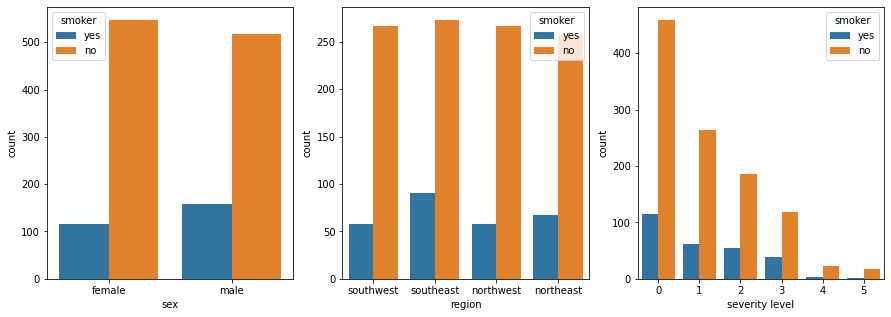

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
sns.countplot(df['sex'],hue = df['smoker'],ax=axis[0])
sns.countplot(df['region'],hue = df['smoker'],ax=axis[1])
sns.countplot(df['severity level'],hue = df['smoker'],ax=axis[2])

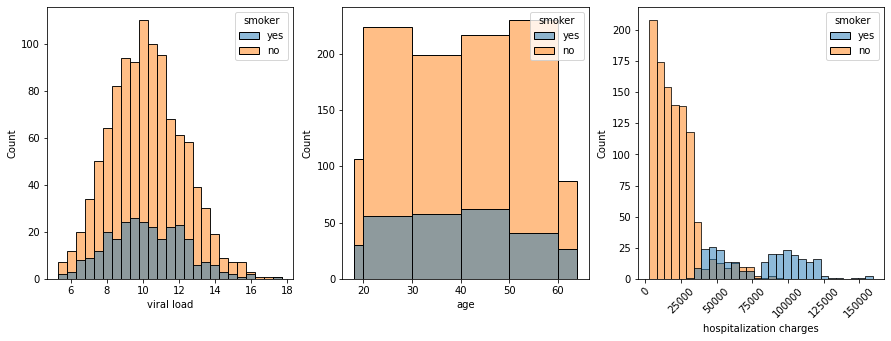

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
plt.xticks(rotation=45)
sns.histplot(data=df,x = 'viral load',hue = 'smoker',ax=axis[0])
sns.histplot(data=df,x = 'age',hue = 'smoker',bins = [18,20,30,40,50,60,64],ax=axis[1])
sns.histplot(data=df,x = 'hospitalization charges',hue = 'smoker',ax=axis[2])

*ANALYZING PARAMETERS WITH RESPECT TO REGION*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


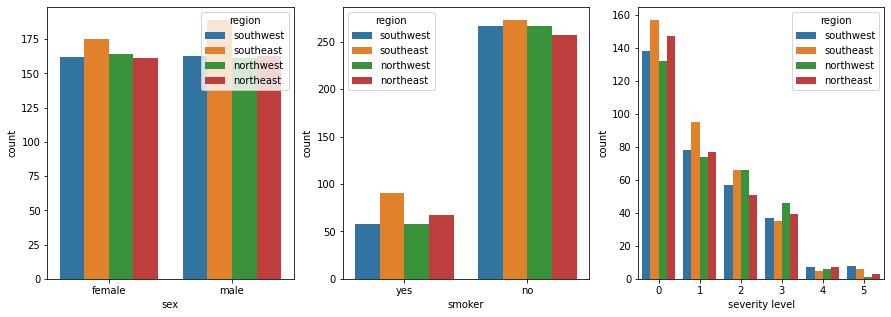

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
sns.countplot(df['sex'],hue = df['region'],ax=axis[0])
sns.countplot(df['smoker'],hue = df['region'],ax=axis[1])
sns.countplot(df['severity level'],hue = df['region'],ax=axis[2])

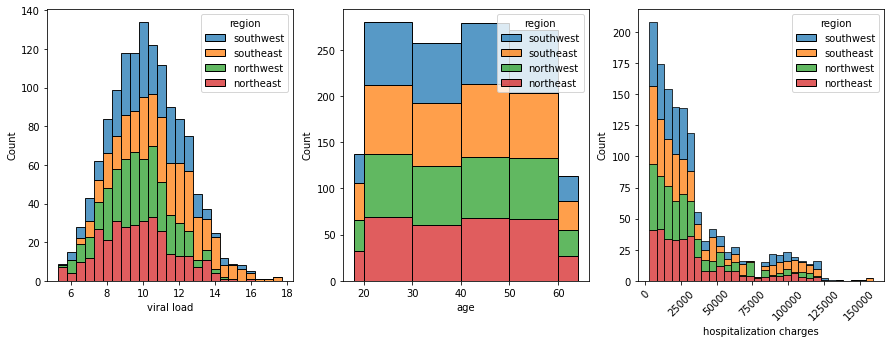

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
plt.xticks(rotation=45)
sns.histplot(data=df,x = 'viral load',hue = 'region',multiple='stack',ax=axis[0])
sns.histplot(data=df,x = 'age',hue = 'region',bins = [18,20,30,40,50,60,64],multiple='stack',ax=axis[1])
sns.histplot(data=df,x = 'hospitalization charges',hue = 'region',multiple='stack',ax=axis[2])

*ANALYZING PARAMETERS WITH RESPECT TO SEVERITY LEVEL*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


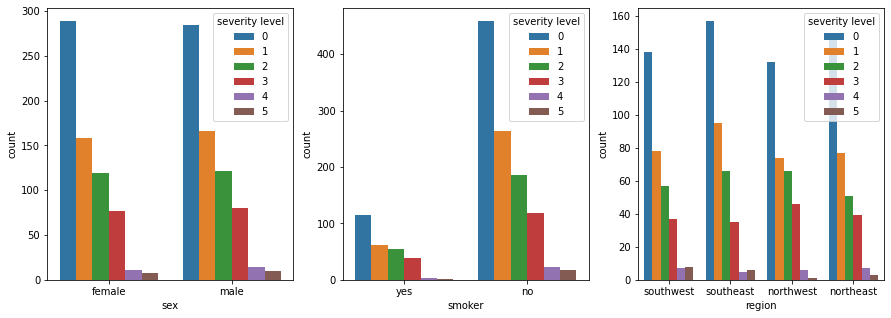

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
sns.countplot(df['sex'],hue = df['severity level'],ax=axis[0])
sns.countplot(df['smoker'],hue = df['severity level'],ax=axis[1])
sns.countplot(df['region'],hue = df['severity level'],ax=axis[2])

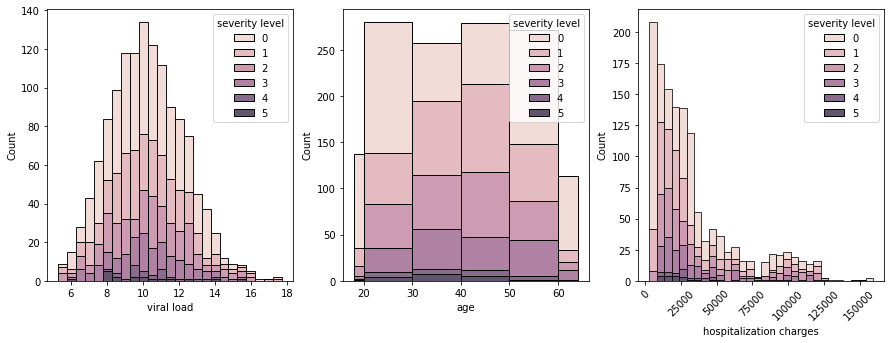

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
plt.xticks(rotation=45)
sns.histplot(data=df,x = 'viral load',hue = 'severity level',multiple='stack',ax=axis[0])
sns.histplot(data=df,x = 'age',hue = 'severity level',bins = [18,20,30,40,50,60,64],multiple='stack',ax=axis[1])
sns.histplot(data=df,x = 'hospitalization charges',hue = 'severity level',multiple='stack',ax=axis[2])

*FEW MORE GRAPHICAL ANALYSIS*

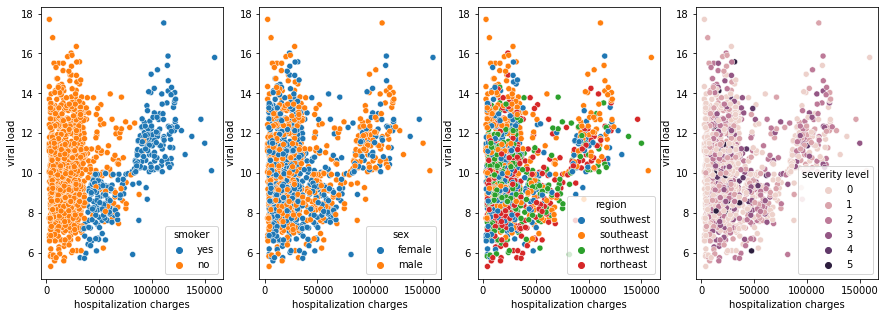

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 4,figsize = (15,5))
sns.scatterplot(data=df,x='hospitalization charges',y='viral load',hue='smoker',ax=axis[0])
sns.scatterplot(data=df,x='hospitalization charges',y='viral load',hue='sex',ax=axis[1])
sns.scatterplot(data=df,x='hospitalization charges',y='viral load',hue='region',ax=axis[2])
sns.scatterplot(data=df,x='hospitalization charges',y='viral load',hue='severity level',ax=axis[3])

*BOX PLOT*

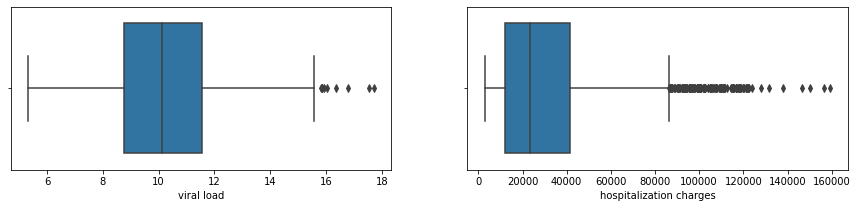

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (15,3))
sns.boxplot(data=df,x='viral load',ax=axis[0])
sns.boxplot(data=df,x='hospitalization charges',ax=axis[1])


 **OUTLIER TREATMENT USING IQR**

In [ ]:
#for viral load
q1_v = df['viral load'].quantile(0.25)
q3_v = df['viral load'].quantile(0.75)
IQR_v = q3_v - q1_v
df = df[(df['viral load']>(q1_v-1.5*IQR_v) ) & (df['viral load']<(q3_v+1.5*IQR_v))]
 

In [ ]:
#for hospitalization charges
q1_h = df['hospitalization charges'].quantile(0.25)
q3_h = df['hospitalization charges'].quantile(0.75)
IQR_h = q3_h - q1_h
df = df[(df['hospitalization charges']>(q1_h-1.5*IQR_h) ) & (df['hospitalization charges']<(q3_h+1.5*IQR_h))]
 

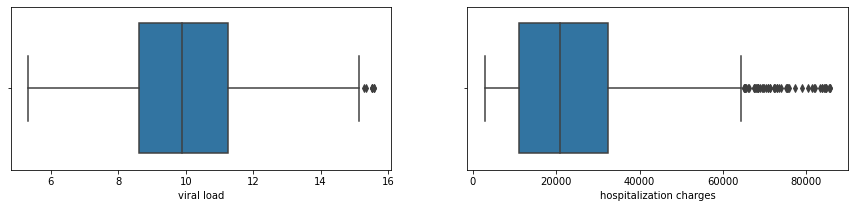

In [ ]:
#checking the plot after removing outliers
fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (15,3))
sns.boxplot(data=df,x='viral load',ax=axis[0])
sns.boxplot(data=df,x='hospitalization charges',ax=axis[1])

In [ ]:
df.shape

(1191, 8)

# **`HYPOTHESIS TESTING`**

# ***Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't?***

To test the above hypothesis, we use T-test Right tailed

Assumption for a T Test
1. Independence : The observations in one sample are independent of the observations in the other sample.
2. Normality : Both samples are approximately normally distributed.
3. Homogenity of Variances : Both samples have approximately the same variance.
4. Random Sampling : Both samples were obtained using random sampling method

In [ ]:
smoker_data = df[df['smoker']=='yes']['hospitalization charges']
non_smoker_data = df[df['smoker']=='no']['hospitalization charges']

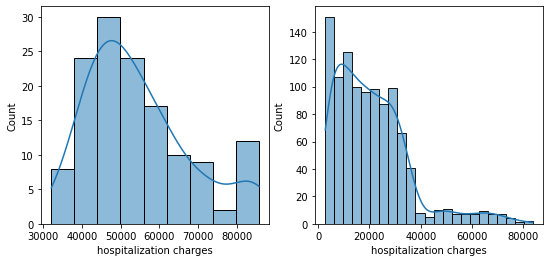

In [ ]:
#Lets check for normality 
fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (9,4))
sns.histplot(smoker_data,ax=axis[0],kde = True)
sns.histplot(non_smoker_data,ax=axis[1],kde =True)

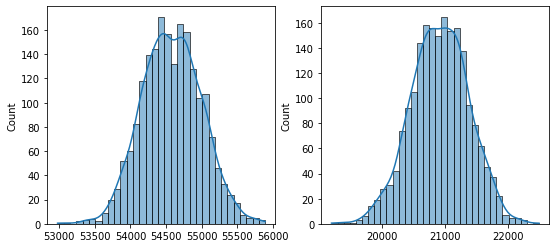

In [ ]:
#since data is not distributed normally, lets apply CLT to convert data into gaussian distribution
def calc_sample_mean0(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_smoker = smoker_data.sample(n=sample_size,replace=True)
    sample_smoker_mean = sample_smoker.mean()
    mean.append(sample_smoker_mean)
  return mean
revised_smoker_data = np.array(calc_sample_mean0(1000,2000))
def calc_sample_mean1(sample_size,no_of_sample_means) :
  mean = []
  for i in range(no_of_sample_means) :
    sample_nonsmoker = non_smoker_data.sample(n=sample_size,replace=True)
    sample_nonsmoker_mean = sample_nonsmoker.mean()
    mean.append(sample_nonsmoker_mean)
  return mean
revised_nonsmoker_data = np.array(calc_sample_mean1(1000,2000))

fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (9,4))
sns.histplot(revised_smoker_data,ax=axis[0],kde = True)
sns.histplot(revised_nonsmoker_data,ax=axis[1],kde =True)

**To check the normality to determine whether the given sample comes from the normal distribution or not we perform Shapiro-Wilk test :**
    Ho(Accepted): Sample is from the normal distributions.(Po>0.05)
    Ha(Rejected): Sample is not from the normal distributions.

In [ ]:
shapiro(revised_smoker_data)

ShapiroResult(statistic=0.9989346265792847, pvalue=0.2759385108947754)

In [ ]:
shapiro(revised_nonsmoker_data)

ShapiroResult(statistic=0.9992904663085938, pvalue=0.6696527004241943)

Since in the above example, the p-value is greater than the alpha(0.05) then we fail to reject the null hypothesis i.e. we have sufficient evidence to say that sample comes from a normal distribution.

**To check the homogenity of variances, we will perform the Levene's test**

    Ho(Accepted): Both the groups have equal variance.(Po>0.05)
    Ha(Rejected): Both the groups do not have equal variance. (Po>0.05)

In [ ]:
stats.levene(revised_smoker_data,revised_nonsmoker_data,center='mean')

LeveneResult(statistic=17.548135065654932, pvalue=2.8616945475330516e-05)

Since p-value is less than the alpha(0.05),we reject the null hypothesis i.e. we have insufficient evidence to say that sample groups have equal variance

3 out of 4 assumptions for Independent T Test are satisfied. Lets do the testing

**𝐻 0** : The mean of the hospitalization charges of people who smoke is equal to people who do not smoke. 

**𝐻 𝑎** : The mean of the hospitalization charges of people who smoke is greater than people who do not smoke

Let 𝜇1 and 𝜇2 be the mean values respectively

**𝐻 0**: 𝜇1 = 𝜇2

**𝐻 𝑎** : 𝜇1 > 𝜇2

**test Statistics :** Independent Samples T test

**alpha :** 0.05 

In [ ]:
stats.ttest_ind(a=revised_smoker_data,b=revised_nonsmoker_data,equal_var=False,alternative='greater')

Ttest_indResult(statistic=2442.1873676391347, pvalue=0.0)

**Since p value is less than alpha, we fail to accept null hypothesis. Hence we have suffiecient evidence to conclude, the mean of the hospitalization charges of people who smoke is greater than people who do not smoke**

# **Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)**

To test the above hypothesis, we use T-test Two tailed

Assumption for a T Test
1. Independence : The observations in one sample are independent of the observations in the other sample.
2. Normality : Both samples are approximately normally distributed.
3. Homogenity of Variances : Both samples have approximately the same variance.
4. Random Sampling : Both samples were obtained using random sampling method

In [ ]:
viral_load_male = df[df['sex']=='male']['viral load']
viral_load_female = df[df['sex']=='female']['viral load']

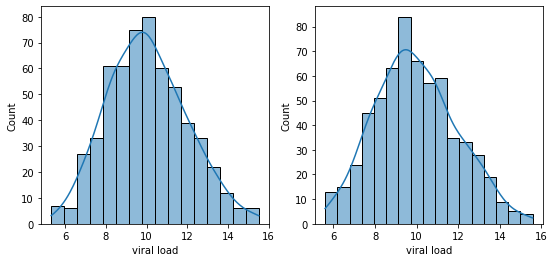

In [ ]:
#Lets check for normality 
fig,axis = plt.subplots(nrows = 1,ncols = 2,figsize = (9,4))
sns.histplot(viral_load_male,ax=axis[0],kde = True)
sns.histplot(viral_load_female,ax=axis[1],kde =True)

**To check the normality to determine whether the given sample comes from the normal distribution or not we perform Shapiro-Wilk test :**
    Ho(Accepted): Sample is from the normal distributions.(Po>0.05)
    Ha(Rejected): Sample is not from the normal distributions.

In [ ]:
shapiro(viral_load_male)

ShapiroResult(statistic=0.9929239749908447, pvalue=0.007620655465871096)

In [ ]:
shapiro(viral_load_female)

ShapiroResult(statistic=0.9914260506629944, pvalue=0.0013309171190485358)

Since in the above example, the p-value is less than the alpha(0.05) then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a normal distribution.

**To check the homogenity of variances, we will perform the Levene's test**

    Ho(Accepted): Both the groups have equal variance.(Po>0.05)
    Ha(Rejected): Both the groups do not have equal variance. (Po>0.05)

In [ ]:
stats.levene(viral_load_male,revised_nonsmoker_data,center='mean')

LeveneResult(statistic=1048.6481064509371, pvalue=2.483869146295488e-193)

In [ ]:
stats.levene(viral_load_female,revised_nonsmoker_data,center='mean')

LeveneResult(statistic=1100.8176710686687, pvalue=1.0942948488042122e-201)

Since p-value is less than the alpha(0.05),we reject the null hypothesis i.e. we have insufficient evidence to say that sample groups have equal variance

2 out of 4 assumptions for T Test are satisfied. Lets do the testing

**𝐻 0** : The mean viral load of females is equal to mean viral load of males. 

**𝐻 𝑎** : The mean viral load of females is not equal to mean viral load of males

Let 𝜇1 and 𝜇2 be the mean values respectively

**𝐻 0**: 𝜇1 = 𝜇2

**𝐻 𝑎** : 𝜇1 ≠ 𝜇2

**test Statistics :** Two Tailed T test

**alpha :** 0.05 

In [ ]:
stats.ttest_ind(a=viral_load_male,b=viral_load_female,equal_var=False)

Ttest_indResult(statistic=0.5677393752537692, pvalue=0.5703192764732152)

**Since p value is greater than alpha, we fail to reject null hypothesis. Hence we have suffiecient evidence to conclude, the mean viral load of female is equal to mean viral load of male**

# **Is the proportion of smoking significantly different across different regions?**

Chi-square test to check if smoking is dependent on the different regions 

Assumptions to carry out Chi-square test holds truw for given data:
1. Both variables are categorical
2. All observations are independent
3. Cells in the contingency table are mutually exclusive.
4. Expected value of cells should be 5 or greater in at least 80% of cells.

H0 : There is no relation between smokers and regions. 
H1 : There is a significant relation between the two.
alpha = 0.05


In [ ]:
#Creating contingency table
table = pd.crosstab(df['smoker'],df['region'])
table

region,northeast,northwest,southeast,southwest
smoker,,,,
no,256,267,267,265
yes,39,38,34,25


In [ ]:
stat, p, dof, expected = chi2_contingency(table)
print('p =',p)

p = 0.31791538258247287


**Since p value is greater than alpha, we have sufficient evidence to conclude that there is no relationship between smokers and regions**

# **Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same?**

ANNOVA Test to determine weather No. of cycles rented are similar or different in different seasons
To conduct the ANNOVA test sample data should comply : 
1. Each observation is independent of any other observation 
2. Values in each sampled groups to be drawn from normally distributed populations
3. Homogeneity of variance : If the ratio of the largest to the smallest sample standard deviation is less than 2, we consider the equal standard deviations assumption as fulfilled


In [ ]:
data_0 = df[df['severity level'] == 0][df['sex']=='female']['viral load']
data_1 = df[df['severity level'] == 1][df['sex']=='female']['viral load']
data_2 = df[df['severity level'] == 2][df['sex']=='female']['viral load']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


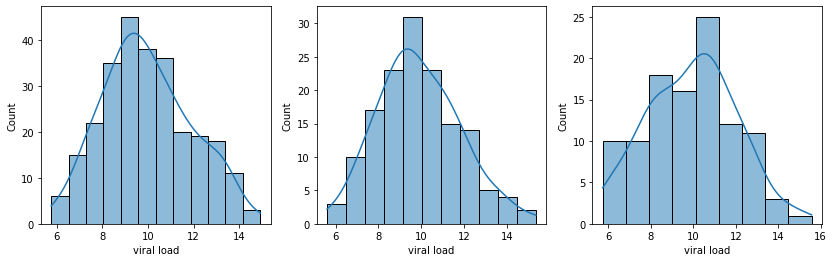

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (14,4))
sns.histplot(data_0,kde =True,ax=axis[0])
sns.histplot(data_1,kde =True,ax=axis[1])
sns.histplot(data_2,kde =True,ax=axis[2])


**To check the normality to determine whether the given sample comes from the normal distribution or not we perform Shapiro-Wilk test :**
    Ho(Accepted): Sample is from the normal distributions.(Po>0.05)
    Ha(Rejected): Sample is not from the normal distributions.

In [ ]:
print(shapiro(data_0))
print(shapiro(data_1))
print(shapiro(data_2))

ShapiroResult(statistic=0.9857213497161865, pvalue=0.009030490182340145)
ShapiroResult(statistic=0.9897480010986328, pvalue=0.35933899879455566)
ShapiroResult(statistic=0.988387405872345, pvalue=0.4941021502017975)


**To check the homogenity of variances, we will perform the Levene's test**

    Ho(Accepted): Groups have equal variance.(Po>0.05)
    Ha(Rejected): Groups do not have equal variance. (Po>0.05)

In [ ]:
stats.levene(data_0,data_1,data_2,center='mean')

LeveneResult(statistic=0.626371096536143, pvalue=0.5349323969485462)

Since p-value is greater than the alpha(0.05),we fail to reject the null hypothesis i.e. we have sufficient evidence to say that sample groups have equal variance

H0 : Mean Viral Load of women are similar in different severity level i.e mu_0 = mu_1 = mu_2

H1 : Mean Viral Load of women are different in different severity level i.e mu_0 ≠ mu_1 ≠ mu_2

Significence Level Alpha : 0.05


In [ ]:
f_oneway(data_0, data_1, data_2)

F_onewayResult(statistic=0.03636576075249481, pvalue=0.9642899920667247)

**Since p value is greater than alpha,we fail to reject null hypothesis.Thus  mean Viral Load of women are similar in different severity level.**